In [17]:
import numpy as np
from numpy.fft import fft, ifft
import time
from math import pi
import matplotlib.pyplot as plt

fourier execution time is 0.337ms


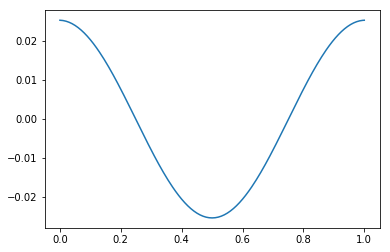

In [18]:
def u_fourier(x, f):
    L = len(x)
    ind_k = np.array([i for i in range(1,L//2+1)] + [i for i in range(-L//2+1,0)])
    denom = np.square(ind_k*2.*np.pi)
    time_start = time.time()
    f_k = np.fft.fft(f(x))
    # fourier components are 0, positive..., nyquist, negative...\n"
    u_k = np.insert(f_k[1:]/denom,0,0.)
    u_i = np.real(np.fft.ifft(u_k))
    time_end = time.time()
    
    print('fourier execution time is {:0.3f}ms'.format((time_end-time_start)*1000.))
    return u_i


def f(x):
    return np.cos(2*pi*x)

M=200
x=np.linspace(0,1,M+1)
u=u_fourier(x,f)
plt.plot(x,u)
plt.show()